In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Epithelial/")

In [3]:
adata0 = sc.read_h5ad("./Epithelial.bySample.n10.filtered.re-run.h5ad")

In [4]:
## read data
adata = sc.read_h5ad("./Epithelial.bySample.n10.filter.bbknn_umap_leiden_marker.res1.2.h5ad")
adata.raw = adata0.raw.to_adata()
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [5]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


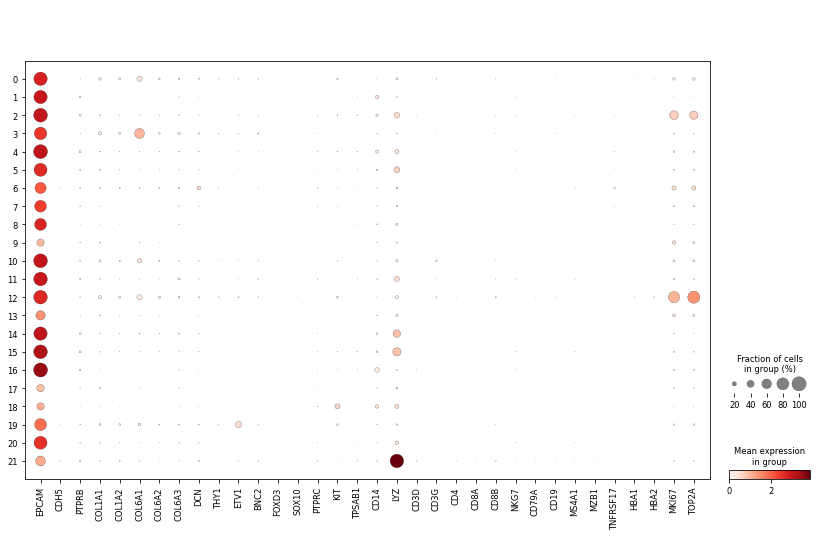

In [6]:
major_markers = ["EPCAM", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "HBA1","HBA2",
                 "MKI67","TOP2A",
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden')

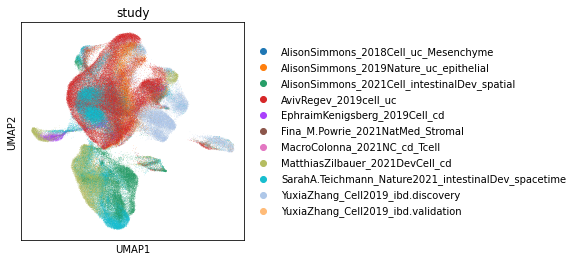

In [7]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["study"])

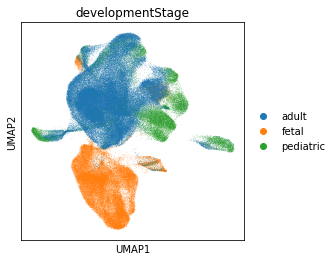

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["developmentStage"])

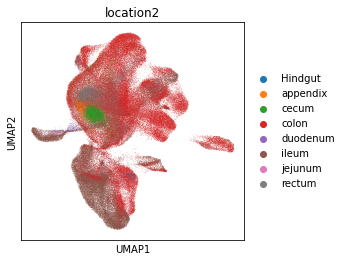

In [9]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["location2"])

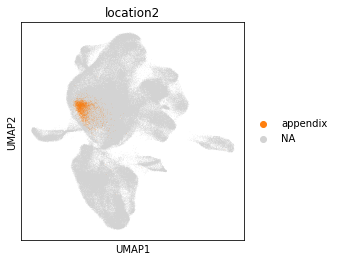

In [10]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=["location2"])
    sc.pl.umap(adata, color=["location2"], groups=["appendix"])

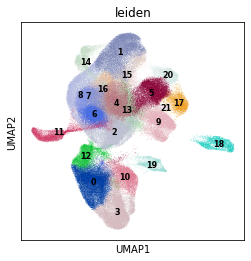

In [11]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

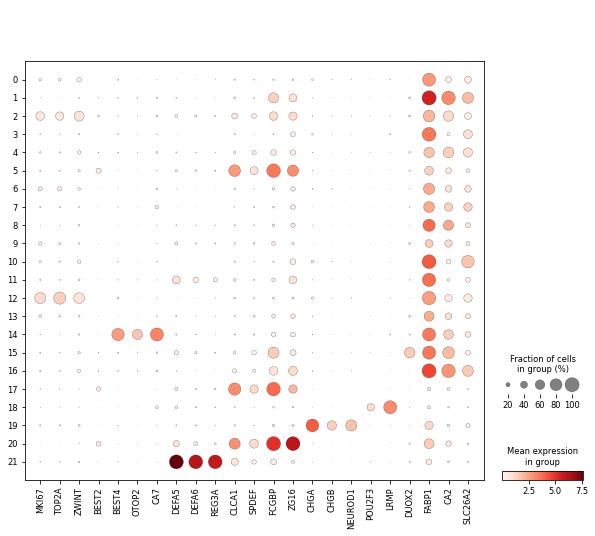

In [12]:
markers = [
    "MKI67","TOP2A","ZWINT", # cycling => C2, C12
    "BEST2",
    "BEST4","OTOP2","CA7", # BEST4 epithelial => C14
    "DEFA5","DEFA6","REG3A", # paneth => C21
    "CLCA1","SPDEF","FCGBP","ZG16", # goblet => C5/C17/C20
    "CHGA","CHGB","NEUROD1", # EC => C19
    "POU2F3","LRMP", # Tuft => C18
    "DUOX2", # DUOX2+ epithelial => C15
    "FABP1","CA2","SLC26A2"
]

sc.pl.dotplot(adata, markers, groupby='leiden')
#sc.pl.dotplot(adata[adata.obs.leiden.isin(['1','4','6','7','8','13','16'])], markers, groupby = "leiden")

In [13]:
adata.obs["label"] = "Epithelial"

##########

select = adata.obs[ adata.obs.leiden.isin(['3']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Fetal enterocyte'

select = adata.obs[ adata.obs.leiden.isin(['0']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Fetal progenitor'

select = adata.obs[ adata.obs.leiden.isin(['12']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Fetal cycling TA'

select = adata.obs[ adata.obs.leiden.isin(['10']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Fetal colonocyte'

##########

select = adata.obs[ adata.obs.leiden.isin(['19']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Enteroendocrine'

select = adata.obs[ adata.obs.leiden.isin(['11']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Enterocyte'

select = adata.obs[ adata.obs.leiden.isin(['14']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'BEST4+ epithelial'

select = adata.obs[ adata.obs.leiden.isin(['18']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Tuft'

select = adata.obs[ adata.obs.leiden.isin(['21']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Paneth'

select = adata.obs[ adata.obs.leiden.isin(['5','17','20']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Goblet' # includign BEST2+ goblet

select = adata.obs[ adata.obs.leiden.isin(['9']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Pediatric colonocyte'

########## C2, C15, C1/C4/C6/C7/C8/C13/C16

select = adata.obs[ adata.obs.leiden.isin(['2']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Cycling TA'

select = adata.obs[ adata.obs.leiden.isin(['15']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'DUOX2+ epithelial'

select = adata.obs[ adata.obs.leiden.isin(['1']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Adult colonocyte'

select = adata.obs[ adata.obs.leiden.isin(['4','6','7','8','13','16']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'TA'

In [14]:
newOrder = ["Goblet","Tuft","Paneth","Enteroendocrine",
            "BEST4+ epithelial","DUOX2+ epithelial",
            "Pediatric colonocyte","Adult colonocyte","Enterocyte",
            "TA","Cycling TA",
            "Fetal progenitor","Fetal cycling TA","Fetal enterocyte","Fetal colonocyte"]
adata.obs.label = pd.Categorical(adata.obs.label, categories = newOrder)

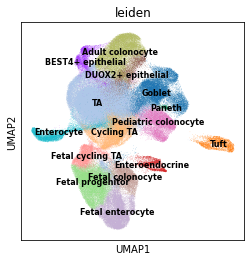

In [15]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='label', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

In [16]:
adata.obs["major"] = "Epithelial"

In [17]:
adata = adata.raw.to_adata()

In [18]:
del adata.obs["location1"]
del adata.obs["location2"]
del adata.obs["developmentStage"]

In [19]:
# adata.var.index = [ x.replace("-","_") for x in adata.var.index.to_list()]

In [20]:
adata.write_h5ad("Epithelial.clean.h5ad")

... storing 'major' as categorical


In [21]:
adata.write_loom("Epithelial.clean.loom", write_obsm_varm=True)

In [22]:
## plot clusters
#for i in list(range(len(set(adata.obs.leiden)))):
#    with rc_context({'figure.figsize': (4, 4)}):
#        sc.pl.umap(adata, color='leiden', groups=[str(i)])

In [23]:
## plot heatmap, dot plot, gene expression, plot DEG
#major_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[:50, 8].to_list()
#sc.pl.dotplot(adata, major_markers, groupby='leiden')

In [24]:
## done